# Домашнее задание №10
*Задание выполнил* **Чащин Артем Максимович**

*Курс:* **3**, *группа:* **МФТИ-1**

**[GitHub](https://github.com/alexvilno/PSU_TIMESERIES/tree/HW2)**

**[Telegram](https://t.me/artemchashchin)**

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sounddevice as sd
from scipy.io import wavfile
from scipy import signal
from pydub import AudioSegment
import librosa
from spafe.features.gfcc import gfcc

In [49]:
from dotenv import load_dotenv
load_dotenv(dotenv_path='../.env')

True

In [50]:
import os

bum = os.getenv('BUM_WAV_SRC')
crisp = os.getenv('CRISP_WAV_SRC')

samplerate1, data1 = wavfile.read(bum)
samplerate2, data2 = wavfile.read(crisp)
print('Audio Shape 1:',np.shape(data1),'Audio Shape 2:',np.shape(data2))


Audio Shape 1: (21359, 2) Audio Shape 2: (22511, 2)


In [51]:
sd.play(data1, samplerate1)
sd.wait()

In [52]:
sd.play(data2, samplerate2)
sd.wait()

In [53]:
duration1 = len(data1)/samplerate1
time1 = np.arange(0,duration1,1/samplerate1) #time vector

duration2 = len(data2)/samplerate2
time2 = np.arange(0,duration2,1/samplerate2) #time vector

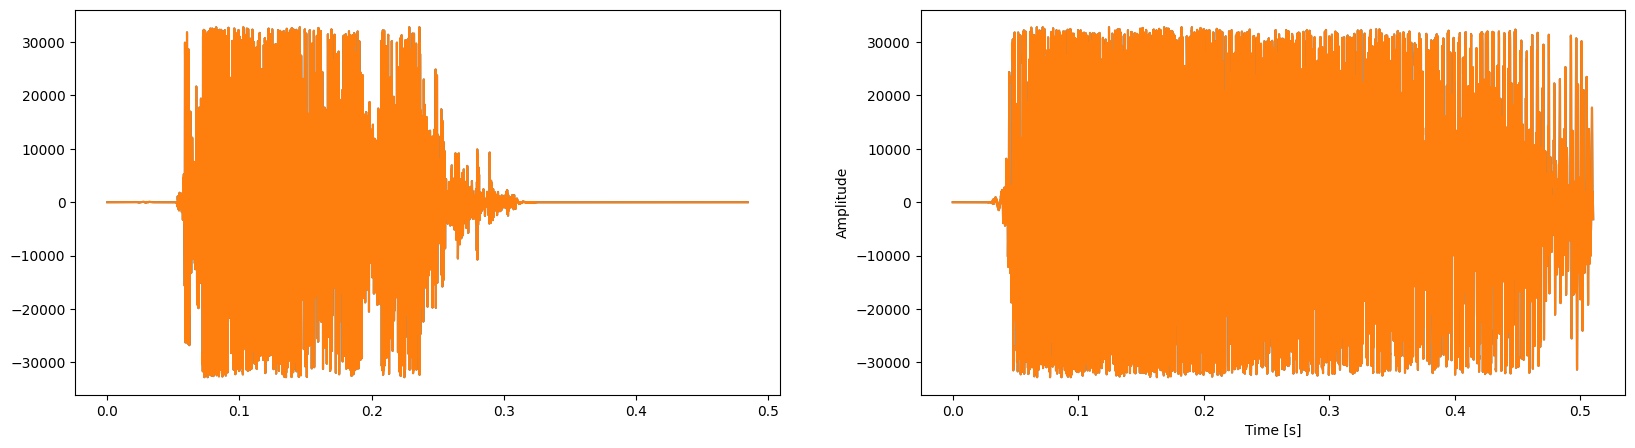

In [63]:
fig, axs = plt.subplots(1,2,figsize=(20, 5))
axs[0].plot(time1, data1)
axs[1].plot(time2, data2)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

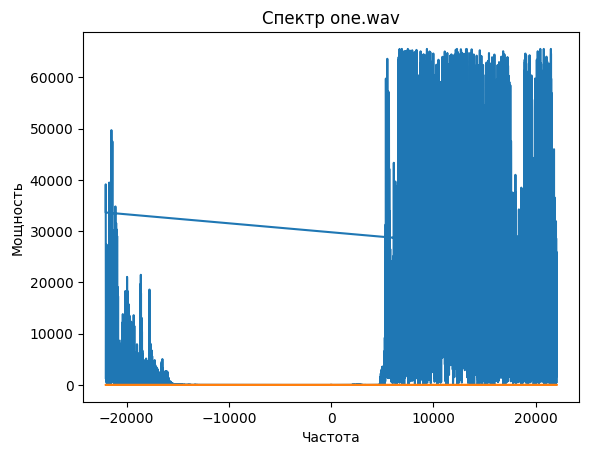

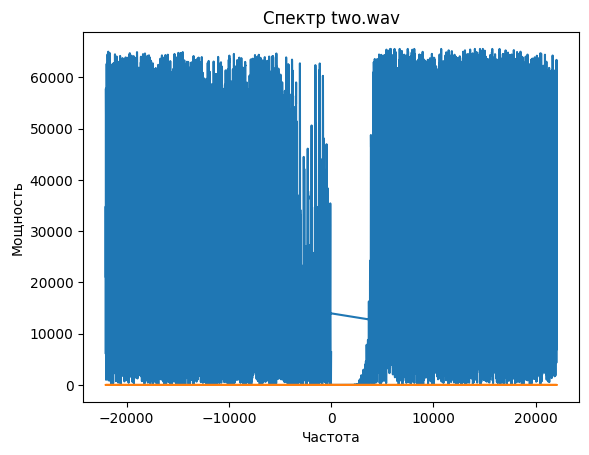

In [55]:
from scipy.fft import fft, fftfreq

duration = len(data1) / samplerate1
N = int(samplerate1 * duration)
yf = fft(data1)
xf = fftfreq(N, 1 / samplerate1)
plt.plot(xf, np.abs(yf))
plt.xlabel('Частота')
plt.ylabel('Мощность')
plt.title('Спектр one.wav')
plt.show()

duration = len(data2) / samplerate2
N = int(samplerate2 * duration)
yf = fft(data2)
xf = fftfreq(N, 1 / samplerate2)
plt.plot(xf, np.abs(yf))
plt.xlabel('Частота')
plt.ylabel('Мощность')
plt.title('Спектр two.wav')
plt.show()

/var/folders/ns/8k4fm20x1_g6s3_88nzjddf00000gn/T/ipykernel_54923/2797764728.py:5: RuntimeWarning: divide by zero encountered in log
  lspg = np.log(spgram)


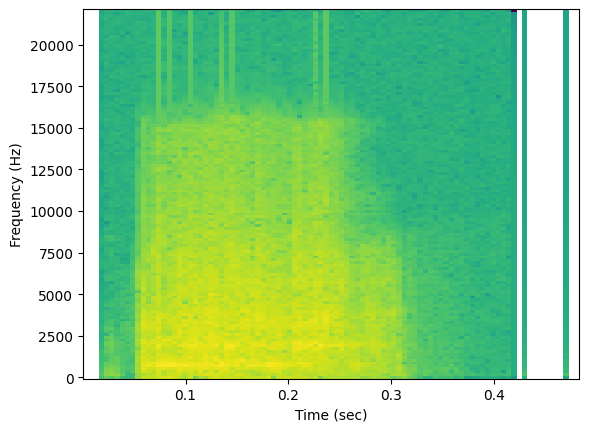

In [56]:
adata = data1[:, 0]
s = samplerate1

fr, tm, spgram = signal.spectrogram(adata,s)
lspg = np.log(spgram)
plt.pcolormesh(tm,fr,lspg,shading='auto')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.show()

/var/folders/ns/8k4fm20x1_g6s3_88nzjddf00000gn/T/ipykernel_54923/1548162407.py:5: RuntimeWarning: divide by zero encountered in log
  lspg = np.log(spgram)


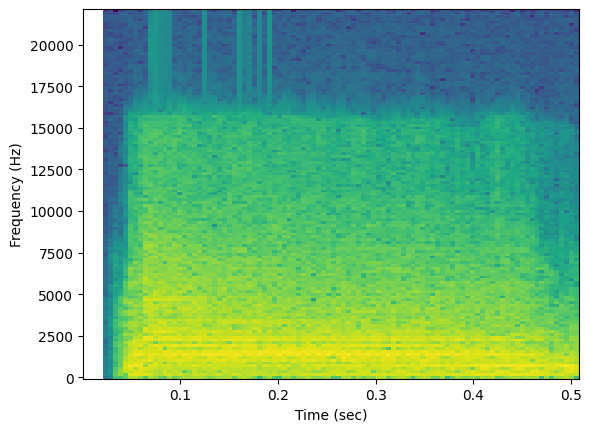

In [57]:
adata = data2[:, 0]
s = samplerate2

fr, tm, spgram = signal.spectrogram(adata,s)
lspg = np.log(spgram)
plt.pcolormesh(tm,fr,lspg,shading='auto')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.show()

In [58]:
samples1, sample_rate1 = librosa.load(bum)

y1 = samples1
sr1 = sample_rate1
mfccs1 = librosa.feature.mfcc(y=y1, sr=sr1, n_mfcc=10)

samples2, sample_rate2 = librosa.load(crisp)

y2 = samples2
sr2 = sample_rate2
mfccs2 = librosa.feature.mfcc(y=y2, sr=sr2, n_mfcc=10)

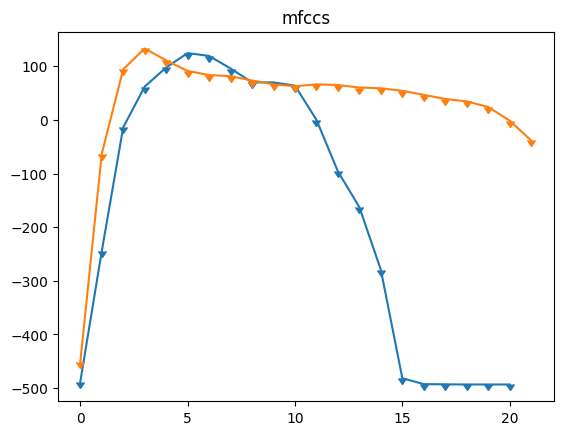

In [59]:
mfccs2 = librosa.feature.mfcc(y=y2, sr=sr2, n_mfcc=10)
s1 = mfccs1[0:1,:][0,:]
t1 = [*range(len(s1))]
s2 = mfccs2[0:1,:][0,:]
t2 = [*range(len(s2))]
plt.plot(t1,  s1.reshape(21,1),marker=matplotlib.markers.CARETDOWNBASE)
plt.plot(t2,  s2.reshape(22,1),marker=matplotlib.markers.CARETDOWNBASE)
plt.title('mfccs')
plt.show()

In [60]:
samples1, sample_rate1 = librosa.load(bum)

y1 = samples1
sr1 = sample_rate1
gfccs1 = gfcc(y1, fs=sr1, num_ceps=1)

samples2, sample_rate2 = librosa.load(crisp)

y2 = samples2
sr2 = sample_rate2
gfccs2 = gfcc(y2, fs=sr2, num_ceps=1)   

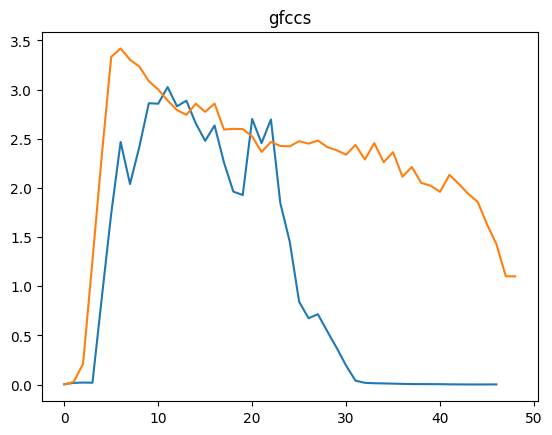

In [61]:
plt.plot(gfccs1)
plt.plot(gfccs2)
plt.title('gfccs')
plt.show()

Отсюда видно, что первый звук (Crisp) имеет более низкую продолжительность, а также состоит из высокого частотного диапазона, в то время как второй звук (Bum) состоит преимущественно из низких и высоких частот, а также имеет высокую продолжительность